SCRIPT LOGIC:
1. Open GPP and SIF files
2. Read in the GPP and SIF data
3. Read in the latitude and longitude data
4. Create a 2d meshgrid of lats and lons
5. Set up the cartopy map
6. Write the data to the map

EXTRA
7. We want the total GPP for each latitude (and over time). Sum the GPP and SIF in time (axis=0) and then along for each latitude (this means summing all longitudes - i.e. 3rd dimension or axis=2)
8. Normalize the GPP and SIF data using the equation (x - xmin) / (xmax - xmin)
9. Create a lineplot for both the SIF and GPP with "longitude" along the x-axis.

In [1]:
# - load libraries
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [2]:
# - read in GPP and SIF data
gpp_file = '/Users/nmacbean/TEACHING/IU/Fall2019/Fall2019_G489_589/data/gpp_sif/orch_gpp_monthly_2007-2011.nc'
sif_file = '/Users/nmacbean/TEACHING/IU/Fall2019/Fall2019_G489_589/data/gpp_sif/gome2_sif_monthly_2007-2011.nc'
gpp_f=nc.Dataset(gpp_file,'r')
sif_f=nc.Dataset(sif_file,'r')
gpp_data = gpp_f.variables['GPP'][:]
sif_data = sif_f.variables['SIF'][:]

In [3]:
# - read in lat and lon data
lats = gpp_f.variables['lat'][:]
lons = gpp_f.variables['lon'][:]
print(lats)
print(lons)

[ 89.  87.  85.  83.  81.  79.  77.  75.  73.  71.  69.  67.  65.  63.
  61.  59.  57.  55.  53.  51.  49.  47.  45.  43.  41.  39.  37.  35.
  33.  31.  29.  27.  25.  23.  21.  19.  17.  15.  13.  11.   9.   7.
   5.   3.   1.  -1.  -3.  -5.  -7.  -9. -11. -13. -15. -17. -19. -21.
 -23. -25. -27. -29. -31. -33. -35. -37. -39. -41. -43. -45. -47. -49.
 -51. -53. -55. -57. -59. -61. -63. -65. -67. -69. -71. -73. -75. -77.
 -79. -81. -83. -85. -87. -89.]
[-179. -177. -175. -173. -171. -169. -167. -165. -163. -161. -159. -157.
 -155. -153. -151. -149. -147. -145. -143. -141. -139. -137. -135. -133.
 -131. -129. -127. -125. -123. -121. -119. -117. -115. -113. -111. -109.
 -107. -105. -103. -101.  -99.  -97.  -95.  -93.  -91.  -89.  -87.  -85.
  -83.  -81.  -79.  -77.  -75.  -73.  -71.  -69.  -67.  -65.  -63.  -61.
  -59.  -57.  -55.  -53.  -51.  -49.  -47.  -45.  -43.  -41.  -39.  -37.
  -35.  -33.  -31.  -29.  -27.  -25.  -23.  -21.  -19.  -17.  -15.  -13.
  -11.   -9.   -7.   -5.   -3. 

In [4]:
# - create a meshgrid for 2d lat and lon grids
gridlons, gridlats = np.meshgrid(lons, lats)

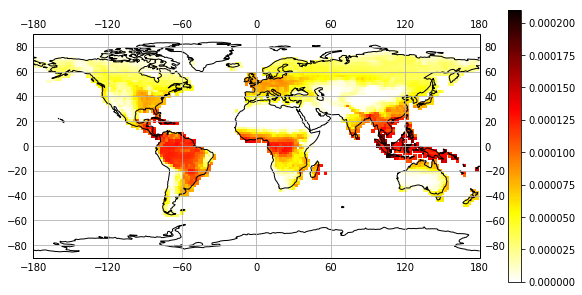

<Figure size 432x288 with 0 Axes>

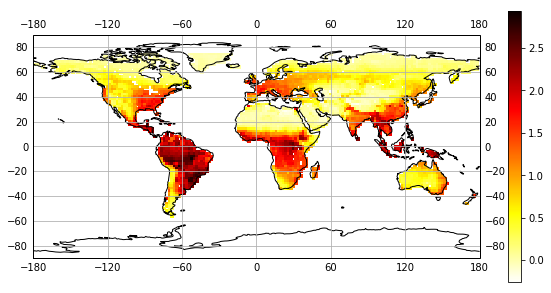

<Figure size 432x288 with 0 Axes>

In [5]:
# - plot GPP and SIF data on two separate maps
# plot mean GPP
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.pcolormesh(gridlons, gridlats, np.mean(gpp_data, axis=0), cmap='hot_r')
plt.colorbar()
plt.show()
plt.clf()

# plot mean SIF
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.pcolormesh(gridlons, gridlats, np.mean(sif_data, axis=0), cmap='hot_r')
plt.colorbar()
plt.show()
plt.clf()

Questions:
1. Do the spatial distributions of the mean GPP and mean SIF look similar, even though the range of each data is not the same?

ANSWER: On a broad global scale, yes, with higher numbers in the tropics and lower numbers in the northern hemisphere. Howevere, there are some differences at regional scale - for example the spatial differences within the Amazon, across central Africa, or in eastern US and NW Europe.

2. In which region is plant productivity the highest (give latitude and longitude information)? Is this what we may expect?

ANSWER: The tropics - yes we expect this given tropical forests are evergreen and therefore photosynthesize (take up CO2) all year round.

### EXTRA if you're familiar with Python or programming

In [6]:
# - save the latitudinal mean GPP and SIF
lat_gpp = np.sum(gpp_data, axis=(0,2))
lat_sif = np.sum(sif_data, axis=(0,2))

In [7]:
# - normalize the latitudinal total GPP and SIF
norm_lat_gpp = (lat_gpp - np.min(lat_gpp)) / (np.max(lat_gpp) - np.min(lat_gpp))
norm_lat_sif = (lat_sif - np.min(lat_sif)) / (np.max(lat_sif) - np.min(lat_sif))

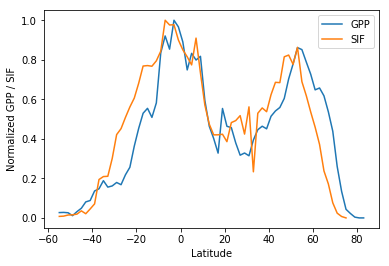

In [8]:
# - plot the GPP and SIF 
plt.plot(lats, norm_lat_gpp, label='GPP')
plt.plot(lats, norm_lat_sif, label='SIF')

# - legend
plt.legend()

# - labels
plt.xlabel('Latitude')
plt.ylabel('Normalized GPP / SIF')

# - show
plt.show()